C:\Users\Yuan\AppData\Local\Temp\ipykernel_5524\602663400.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


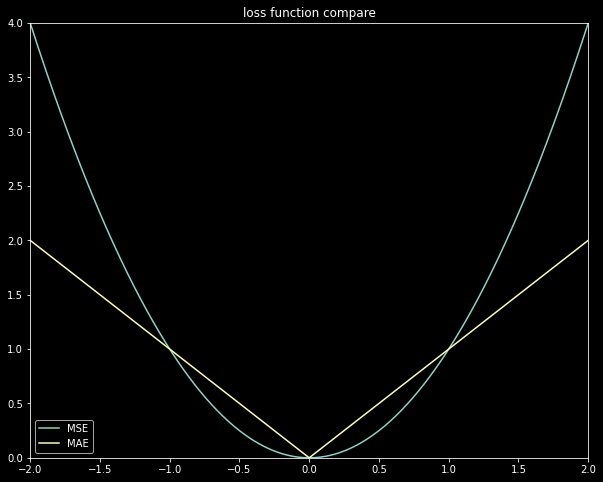

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def SE(x,y,intc,beta):
    return (1./len(x))*(0.5)*sum(y - beta * x - intc)**2

def L1(intc,beta,lam):
    return lam*(np.abs(intc)+np.abs(beta))

def L2(intc,beta,lam):
    return lam*(intc**2 + beta**2)

def MAE(a):
    return np.abs(a)

def MSE(a):
    return a ** 2

N = 100
x = np.random.randn(N)
y = 2 * x + np.random.randn(N)

beta_N = 500
beta = np.linspace(-2, 2, beta_N)

intc = 0.0

SE_array = np.array([MSE(i) for i in beta])
L1_array = np.array([MAE(i) for i in beta])
L2_array = np.array([L2(intc,i,lam=1) for i in beta])
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(beta,SE_array,label='MSE')
ax1.plot(beta,L1_array,label='MAE')
# ax1.plot(beta,L2_array,label='L2 norm')
plt.ylim(0, 4)
plt.xlim(-2, 2)
plt.title('loss function compare')
plt.legend()
fig1.show()


In [5]:
loss_file = open("./loss_log/gan_loss_L1_48_8e_2_1e_2", "r")
losses = loss_file.readlines()
pix_loss = []
pix_loss_w = []
fea_loss = []
gan_loss = []
gan_loss_w = []
total_loss = []
for i in losses:
    loss = i.split(',')
    pix_loss.append(float(loss[0]))
    pix_loss_w.append(float(loss[1]))
    fea_loss.append(float(loss[2]))
    gan_loss.append(float(loss[3]))
    gan_loss_w.append(float(loss[4]))
    total_loss.append(float(loss[5]))
loss_file.close()

In [6]:
x = [i+1 for i in range(len(pix_loss))]
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


C:\Users\Yuan\AppData\Local\Temp\ipykernel_25388\2663207153.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


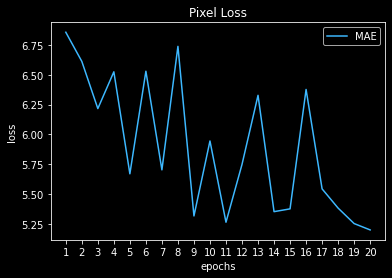

In [7]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,pix_loss,label='MAE', color='#3db8ff')
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Pixel Loss')
plt.legend()
fig1.show()

C:\Users\Yuan\AppData\Local\Temp\ipykernel_25388\3470076117.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


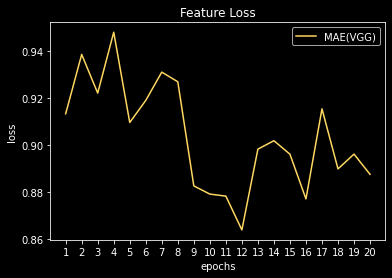

In [8]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,fea_loss,label='MAE(VGG)', color='#ffd862')
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Feature Loss')
plt.legend()
fig1.show()

C:\Users\Yuan\AppData\Local\Temp\ipykernel_25388\3919529486.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


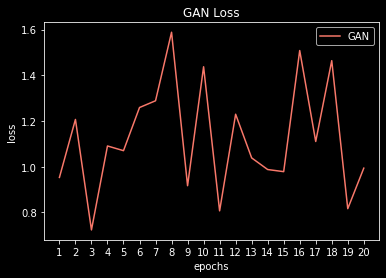

In [9]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,gan_loss,label='GAN', color='#f8786a')
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('GAN Loss')
plt.legend()
fig1.show()

C:\Users\Yuan\AppData\Local\Temp\ipykernel_25388\1697734815.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


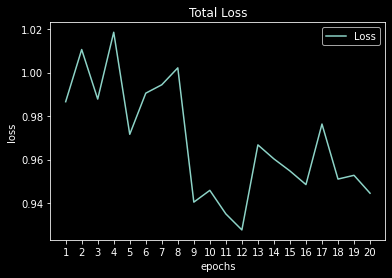

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,total_loss,label='Loss')
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Total Loss')
plt.legend()
fig1.show()

In [1]:
import cv2
import numpy as np

In [86]:
im1 = cv2.imread("../dataset/vimeo90k/hr/00002/0025/im1.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)/255
im2 = cv2.imread("../dataset/vimeo90k/hr/00002/0025/im2.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)/255
im3 = cv2.imread("../dataset/vimeo90k/hr/00002/0025/im3.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)/255

multiple = 51

MAE_im1 = (np.mean(np.abs(im1*multiple-im2*multiple)) + np.mean(np.abs(im1*multiple-im3*multiple)))/3
MAE_im2 = (np.mean(np.abs(im2*multiple-im1*multiple)) + np.mean(np.abs(im2*multiple-im3*multiple)))/3
MAE_im3 = (np.mean(np.abs(im3*multiple-im1*multiple)) + np.mean(np.abs(im3*multiple-im2*multiple)))/3

MSE_im1 = (np.mean(np.power(im1*multiple-im2*multiple, 2)) + np.mean(np.power(im1*multiple-im3*multiple, 2)))/3
MSE_im2 = (np.mean(np.power(im2*multiple-im1*multiple, 2)) + np.mean(np.power(im2*multiple-im3*multiple, 2)))/3
MSE_im3 = (np.mean(np.power(im3*multiple-im1*multiple, 2)) + np.mean(np.power(im3*multiple-im2*multiple, 2)))/3

In [87]:
print(MAE_im1)
print(MAE_im2)
print(MAE_im3)
print(MSE_im1)
print(MSE_im2)
print(MSE_im3)
im1_2_diff = np.abs(im1-im2)

0.019297537704308827
0.013826211293538412
0.01696200668811798
0.005366213619709015
0.0032134931534528732
0.00422782947619756


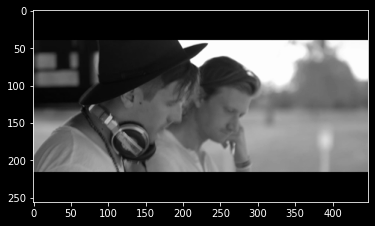

In [73]:
plt.imshow(im1, cmap='gray')


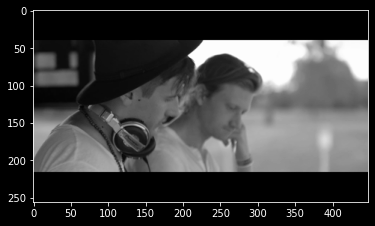

In [74]:
plt.imshow(im2, cmap='gray')


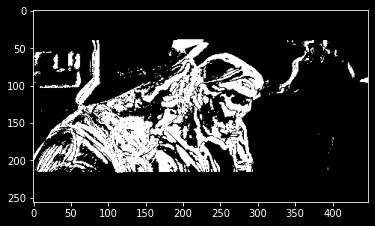

In [89]:
plt.imshow((im1_2_diff*255>5), cmap='gray')

In [24]:
plt.imshow(np.abs(im1[:,:,0]-im2[:,:,0]), cmap="gray", vmin=0, vmax=255)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

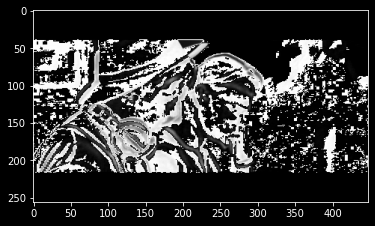

In [57]:
plt.imshow(np.abs(im2[:,:,0]-im1[:,:,0]), cmap="gray", vmin=0, vmax=255)